In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [28]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [30]:
df.duplicated().sum()

22

In [31]:
df = df.drop_duplicates(keep = 'first')

In [32]:
df.duplicated().sum()

0

In [45]:
macd_x = df.iloc[:, :11]
macd_x = (macd_x == "Yes").astype(int)
column_means = np.round(macd_x.mean(), 2)

column_names = macd_x.columns

for feature, mean_value in zip(column_names, column_means):
    print(f"{feature}: {mean_value}")

yummy: 0.55
convenient: 0.91
spicy: 0.1
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


In [46]:
macd_x.shape

(1431, 11)

In [34]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(macd_x)

PCA()

In [35]:
variance = pca.explained_variance_
standard_deviation = np.sqrt(variance)
standard_deviation
print("Standard Deviation of Principal Components:")
for i, sd in enumerate(standard_deviation):
    print(f"PC{i+1}: {sd}")
# standard deviation

Standard Deviation of Principal Components:
PC1: 0.7579764630231708
PC2: 0.6067137534625555
PC3: 0.5049279707062184
PC4: 0.399128084771748
PC5: 0.338692343885895
PC6: 0.31210587143091784
PC7: 0.2917606638702463
PC8: 0.2767213887962061
PC9: 0.2672011736259745
PC10: 0.2502917285492645
PC11: 0.23834989623396902


In [36]:
pca.explained_variance_ratio_
print("Proportion Variance of Principal Components:")
for i, sd in enumerate(standard_deviation):
    print(f"PC{i+1}: {sd}")
# proportion of variance

Proportion Variance of Principal Components:
PC1: 0.7579764630231708
PC2: 0.6067137534625555
PC3: 0.5049279707062184
PC4: 0.399128084771748
PC5: 0.338692343885895
PC6: 0.31210587143091784
PC7: 0.2917606638702463
PC8: 0.2767213887962061
PC9: 0.2672011736259745
PC10: 0.2502917285492645
PC11: 0.23834989623396902


In [37]:
np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion of Principal Components:")
for i, sd in enumerate(standard_deviation):
    print(f"PC{i+1}: {sd}")
# cumulaive proportion

Cumulative Proportion of Principal Components:
PC1: 0.7579764630231708
PC2: 0.6067137534625555
PC3: 0.5049279707062184
PC4: 0.399128084771748
PC5: 0.338692343885895
PC6: 0.31210587143091784
PC7: 0.2917606638702463
PC8: 0.2767213887962061
PC9: 0.2672011736259745
PC10: 0.2502917285492645
PC11: 0.23834989623396902


In [38]:
# converting results into a dataframe in a rounded form

pca_summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                            'Proportion of Variance': pca.explained_variance_ratio_},
                           index=['PC{}'.format(i+1) for i in range(pca.n_components_)])
pca_summary_rounded = pca_summary.round(1)

pca_summary_rounded

,Standard deviation,Proportion of Variance
PC1,0.8,0.3
PC2,0.6,0.2
PC3,0.5,0.1
PC4,0.4,0.1
PC5,0.3,0.1
PC6,0.3,0.1
PC7,0.3,0.0
PC8,0.3,0.0
PC9,0.3,0.0
PC10,0.3,0.0


In [39]:
# rotation matrix of the component
rotation_matrix = pca.components_

# Create a DataFrame with component labels
rotation_df = pd.DataFrame(rotation_matrix, columns=['PCA_Component {}'.format(i+1) for i in range(rotation_matrix.shape[1])])

print("Rotation ({} x {}):".format(rotation_matrix.shape[0], rotation_matrix.shape[1]))
print(rotation_df)

Rotation (11 x 11):
    PCA_Component 1  PCA_Component 2  PCA_Component 3  PCA_Component 4  \
0         -0.473652        -0.155302        -0.007448         0.116058   
1          0.370610         0.016830         0.019080        -0.034366   
2         -0.301355        -0.062892        -0.039472        -0.322261   
3          0.053818        -0.144547         0.199271        -0.349149   
4         -0.307839         0.276766         0.073973        -0.069891   
5          0.170267        -0.343663        -0.353279        -0.403426   
6         -0.278457        -0.060092         0.707035        -0.392024   
7          0.012604        -0.108304         0.381458         0.590763   
8          0.574230        -0.015511         0.395773        -0.160342   
9         -0.107604        -0.652477        -0.079203        -0.011932   
10         0.042649        -0.561015         0.140418         0.251830   

    PCA_Component 5  PCA_Component 6  PCA_Component 7  PCA_Component 8  \
0          0.3036

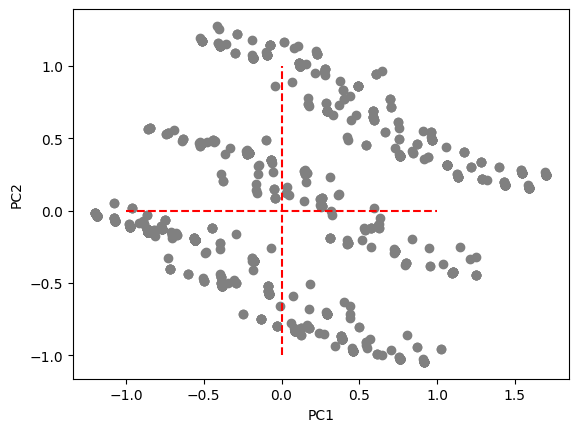

In [40]:
import matplotlib.pyplot as plt


# Plot predicted values
predicted_values = pca.transform(macd_x)
plt.scatter(predicted_values[:, 0], predicted_values[:, 1], color='grey')

# Plot projected axes
plt.plot([0, 0], [-1, 1], color='r', linestyle='--')
plt.plot([-1, 1], [0, 0], color='r', linestyle='--')

# Set axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

In [17]:
# Extracting Segments

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
silhouette_scores = []
cluster_labels = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(macd_x)
    cluster_labels.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(macd_x, kmeans.labels_))

best_k = np.argmax(silhouette_scores)
macd_km28 = cluster_labels[best_k]


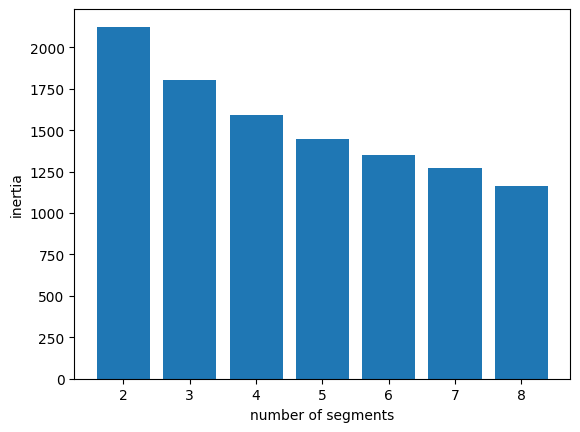

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
k_values = range(2, 9)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(macd_x)
    inertias.append(kmeans.inertia_)

best_k = np.argmin(inertias) + 2
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
best_kmeans.fit(macd_x)

plt.bar(k_values, inertias)
plt.xlabel("number of segments")
plt.ylabel("inertia")
plt.show()

In [54]:
# 2. Using Gaussian Mixture

from sklearn.mixture import GaussianMixture

np.random.seed(1234)

X = np.array(macd_x) # Assuming MD.x is the input data

bic_scores = []
models = []

for k in range(2, 9):
    bic = []
    for _ in range(10):
        gmm = GaussianMixture(n_components=k, covariance_type='full')
        gmm.fit(X)
        bic.append(gmm.bic(X))
    bic_scores.append(np.mean(bic))
    models.append(gmm)

best_model_index = np.argmin(bic_scores)
best_model = models[best_model_index]

print(best_model)

GaussianMixture(n_components=8)


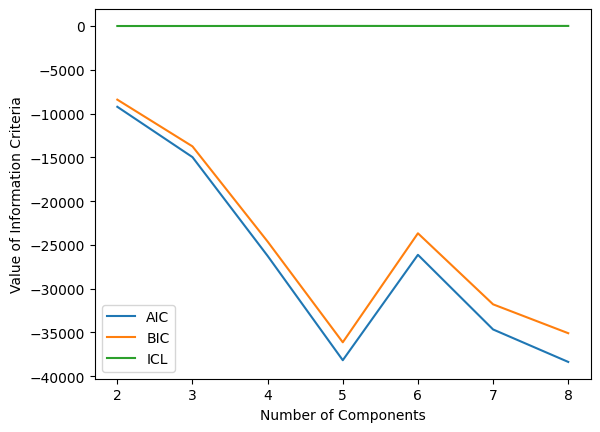

[[2 2]
 [3 0]
 [3 2]
 ...
 [3 0]
 [0 1]
 [1 2]]
[[2 1]
 [3 0]
 [3 0]
 ...
 [3 0]
 [0 3]
 [1 2]]
9.428333351445724
9.391519064654414


In [55]:
from sklearn.mixture import GaussianMixture

n_components = range(2, 9)
models = []
for n in n_components:
    model = GaussianMixture(n_components=n)
    model.fit(macd_x)
    models.append(model)

import matplotlib.pyplot as plt
aic = [model.aic(macd_x) for model in models]
bic = [model.bic(macd_x) for model in models]
icl = [model.lower_bound_ for model in models]

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, icl, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

best_model = models[2]

kmeans = KMeans(n_clusters=4,  n_init=10)
kmeans.fit(macd_x)
kmeans_clusters = kmeans.predict(macd_x)
mixture_clusters = best_model.predict(macd_x)

table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)

mixture_model = GaussianMixture(n_components=4)
mixture_model.fit(macd_x, kmeans_clusters)

new_mixture_clusters = mixture_model.predict(macd_x)
table = np.column_stack((kmeans_clusters, new_mixture_clusters))
print(table)

log_likelihood = mixture_model.score(macd_x)
print(log_likelihood)

log_likelihood_best = best_model.score(macd_x)
print(log_likelihood_best)



Text(0.5, 1.0, 'Dendrogram')

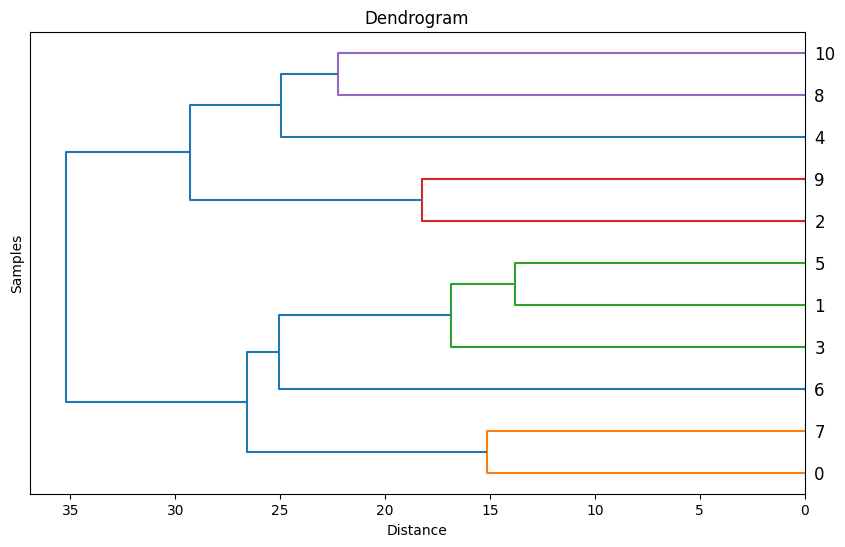

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

MD_vcluster = linkage(macd_x.T, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(MD_vcluster, orientation='left')
plt.xlabel("Distance")
plt.ylabel("Samples")
plt.title("Dendrogram")

In [62]:
df['Like']= df.Like.replace('I love it!+5','+5')
df['Like']= df.Like.replace('I hate it!-5','-5')

<ipython-input-62-5edec029e9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Like']= df.Like.replace('I love it!+5','+5')
<ipython-input-62-5edec029e9e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Like']= df.Like.replace('I hate it!-5','-5')


<Figure size 800x600 with 0 Axes>

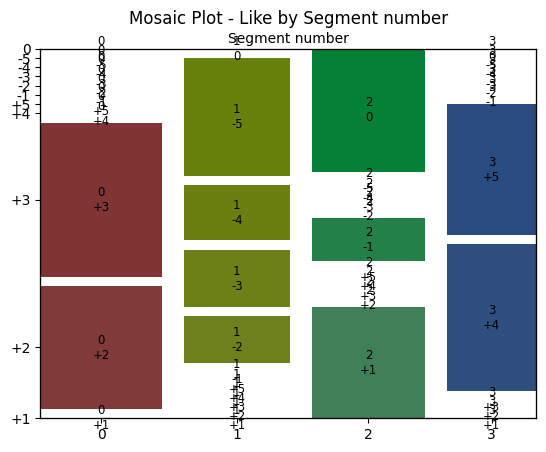

In [63]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df[['Like']])
k4 = kmeans.labels_

k4_like_table = pd.crosstab(index=k4, columns=df['Like'])
plt.figure(figsize=(8, 6))
mosaic(k4_like_table.stack(), title='Mosaic Plot - Like by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Like")
plt.show()

<Figure size 800x600 with 0 Axes>

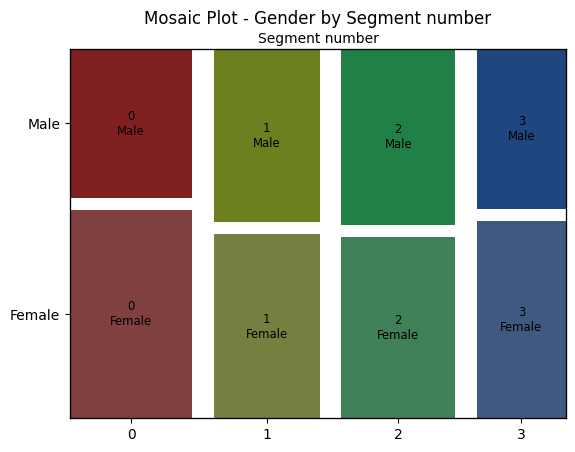

In [64]:
k4_gender_table = pd.crosstab(index=k4, columns=df['Gender'])
plt.figure(figsize=(8, 6))
mosaic(k4_gender_table.stack(), title='Mosaic Plot - Gender by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Gender")
plt.show()

In [66]:
df.VisitFrequency.value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

In [67]:
df.Gender.value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['VisitFrequency'] = labelencoder.fit_transform(df['VisitFrequency'])

<ipython-input-68-bb8608115bb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VisitFrequency'] = labelencoder.fit_transform(df['VisitFrequency'])


In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

<ipython-input-69-05d0d73c0150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = labelencoder.fit_transform(df['Gender'])


In [73]:
df['Like.n'] = df['Like'].astype(int)

<ipython-input-73-12ea3364c1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Like.n'] = df['Like'].astype(int)


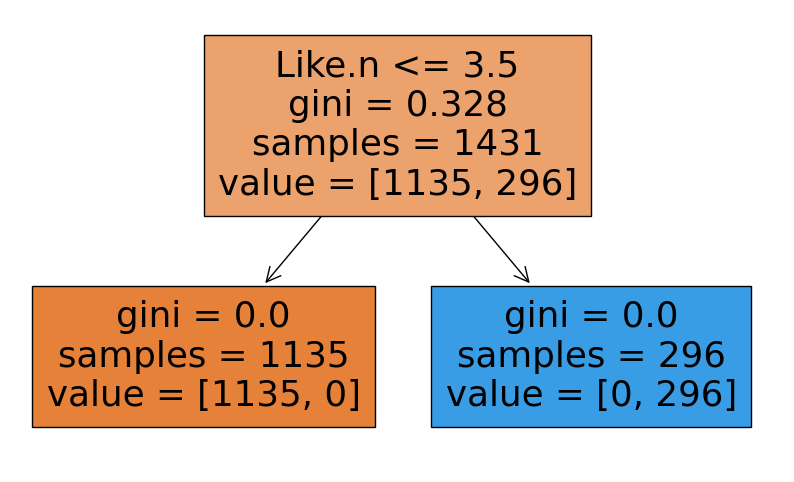

In [74]:
X = df[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (k4 == 3).astype(int)

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

In [76]:
visit = df.groupby(k4)['VisitFrequency'].mean()
visit

0    2.449383
1    2.877841
2    2.441799
3    2.871622
Name: VisitFrequency, dtype: float64

In [77]:
female = df.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())
female

0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64